In [14]:
#!pip install scipy==1.8.1
import scipy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [15]:
#!pip install networkx --upgrade
import networkx as nx

# Load data

In [16]:
comunas            = pd.read_csv(filepath_or_buffer="comunas.csv")
comunas_commutes   = pd.read_csv(filepath_or_buffer="comunas_commutes.csv", names = ["comunas_1", "comunas_2", "n_commutes"])
comunas_firms      = pd.read_csv(filepath_or_buffer="comunas_firms.csv")
comunas_gmaps      = pd.read_csv(filepath_or_buffer="comunas_gmaps.csv")
comunas_pop        = pd.read_csv(filepath_or_buffer="comunas_pop.csv")
comunas_stratum    = pd.read_csv(filepath_or_buffer="comunas_stratum.csv")

# rename: replace space with underscore
comunas.rename(columns={'comuna latitude': 'comuna_latitude', 'comuna longitude': 'comuna_longitude'}, inplace=True)

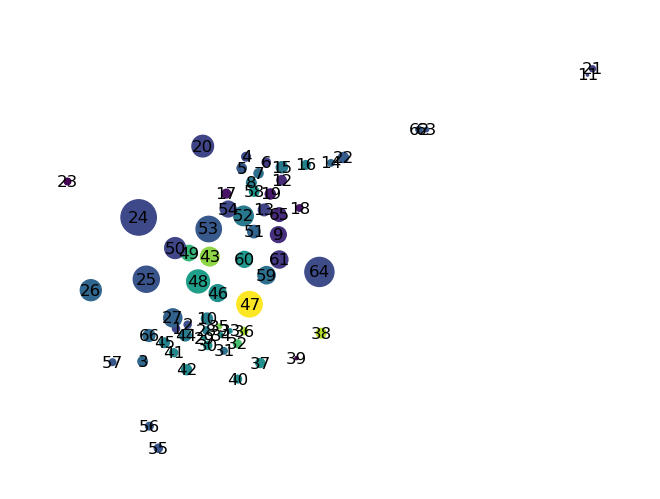

In [17]:
G = nx.Graph()
pos = dict()

G.add_nodes_from(comunas["comuna_index"])
G.add_edges_from(zip(comunas_commutes["comunas_1"], comunas_commutes["comunas_2"]))

for index, row in comunas.iterrows():
    pos[row['comuna_index']] = (row["comuna_longitude"], row["comuna_latitude"])

nx.draw(G, pos=pos, with_labels = True, 
            node_size = 0.002*comunas_pop["population"],
            node_color = comunas_stratum["stratum"],
            edge_color = "white"  #if white no edges are shown
            )
plt.show()